# How to create Mercator grids

In [1]:
from nes import *
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Create dataset

### Define grid details

In [3]:
projection='mercator'
lat_ts = -1.5
lon_0 = -18.0
nx = 210
ny = 236
inc_x = 50000
inc_y = 50000
x_0 = -126017.5
y_0 = -5407460.0

In [4]:
nessy = create_nes(comm=None, info=False, projection=projection,
                   lat_ts=lat_ts, lon_0=lon_0, nx=nx, ny=ny, 
                   inc_x=inc_x, inc_y=inc_y, x_0=x_0, y_0=y_0)

### Read projection

In [5]:
nessy.projection

Proj('+proj=merc +lat_ts=-1.5 +lon_0=-18 +x_0=0 +y_0=0 +a=6378137 +b=6356752.3142 +units=m +no_defs', preserve_units=True)

In [6]:
nessy.projection_data

{'grid_mapping_name': 'mercator',
 'standard_parallel': -1.5,
 'longitude_of_projection_origin': -18.0,
 'x_0': -126017.5,
 'y_0': -5407460.0,
 'inc_x': 50000,
 'inc_y': 50000,
 'nx': 210,
 'ny': 236}

## 2. Plot

In [7]:
nessy.create_shapefile()

,geometry
FID,
0,"POLYGON ((-19.13242 -43.82824, -18.68311 -43.8..."
1,"POLYGON ((-18.68311 -43.82824, -18.23380 -43.8..."
2,"POLYGON ((-18.23380 -43.82824, -17.78449 -43.8..."
3,"POLYGON ((-17.78449 -43.82824, -17.33518 -43.8..."
4,"POLYGON ((-17.33518 -43.82824, -16.88587 -43.8..."
...,...
49555,"POLYGON ((72.97625 49.59982, 73.42556 49.59982..."
49556,"POLYGON ((73.42556 49.59982, 73.87487 49.59982..."
49557,"POLYGON ((73.87487 49.59982, 74.32418 49.59982..."


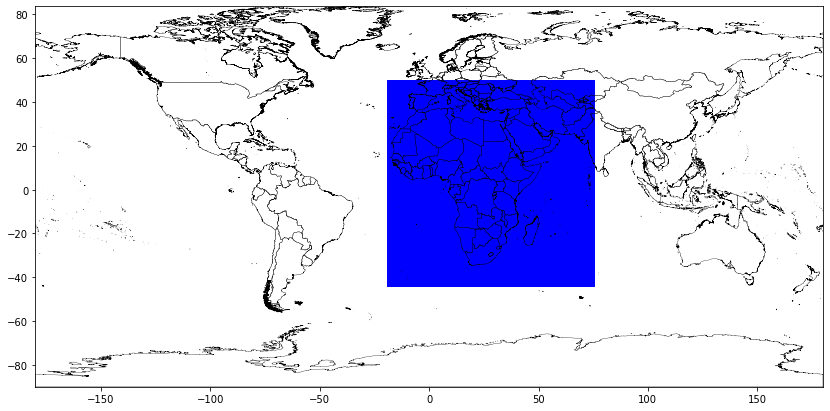

In [8]:
fig, ax = plt.subplots(1, figsize=(19, 7))
nessy.shapefile.plot(ax=ax, facecolor='blue', edgecolor='blue')
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [9]:
nessy.to_netcdf('mercator_grid.nc', info=True)

Rank 000: Creating mercator_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done


### Write shapefile

In [10]:
nessy.to_shapefile('mercator_grid_shp')

/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3058: UserWarning: No vertical level has been specified. The first one will be selected.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3069: UserWarning: No time has been specified. The first one will be selected.
  warnings.warn(msg)
